# Predict Weight Category

To develop a predictive model to categorize books into weight classes (light, middle weight, heavy) based on their physical attributes.



**Predicting weight categories for books is important because it:**

1. Optimizes inventory management and storage efficiency.
2. Aids in cost-effective logistics and shipping planning.
3. Enhances customer experience and informs purchasing decisions.


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sp1thas/book-depository-dataset/

100% 408M/409M [00:03<00:00, 125MB/s] 
100% 409M/409M [00:03<00:00, 118MB/s]


In [ ]:
!unzip /content/book-depository-dataset.zip

Archive:  /content/book-depository-dataset.zip
  inflating: authors.csv             
  inflating: categories.csv          
  inflating: dataset.csv             
  inflating: formats.csv             
  inflating: places.csv              


# EDA

In [ ]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,NaN,NaN,NaN,...,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,NaN,NaN,NaN,...,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,New edition,NaN,NaN,...,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,NaN,Export - Airside ed,NaN,...,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,NaN,NaN,NaN,...,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00


In [ ]:
df.dtypes

authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
format                float64
id                      int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
dtype: object

In [ ]:
df.shape

(1109383, 28)

In [ ]:
df.describe()

,bestsellers-rank,dimension-x,dimension-y,dimension-z,format,id,index-date,isbn13,publication-place,rating-avg,rating-count,weight
count,6.425410e+05,1.061156e+06,1.015852e+06,1.061156e+06,1.102761e+06,1.109383e+06,0.0,1.109383e+06,0.0,669253.000000,6.692530e+05,1.022210e+06
mean,9.209777e+05,1.607659e+02,2.249102e+02,2.644117e+01,1.774440e+00,9.781658e+12,NaN,9.781658e+12,NaN,3.974918,1.239215e+04,4.616623e+02
std,8.642210e+05,3.802671e+01,4.347322e+01,4.779869e+01,2.124599e+00,1.747523e+09,NaN,1.747523e+09,NaN,0.543605,1.333263e+05,6.587618e+02
min,1.001000e+03,2.500000e-01,1.000000e+00,1.000000e-01,1.000000e+00,9.780000e+12,NaN,9.780000e+12,NaN,1.000000,1.000000e+00,1.500000e+01
25%,1.654890e+05,1.380000e+02,2.030000e+02,9.000000e+00,1.000000e+00,9.780801e+12,NaN,9.780801e+12,NaN,3.730000,5.000000e+00,1.814400e+02
50%,6.646830e+05,1.520000e+02,2.290000e+02,1.575000e+01,1.000000e+00,9.781474e+12,NaN,9.781474e+12,NaN,4.000000,3.900000e+01,3.180000e+02
75%,1.455812e+06,1.780000e+02,2.420000e+02,2.500000e+01,2.000000e+00,9.781743e+12,NaN,9.781743e+12,NaN,4.260000,5.200000e+02,5.352400e+02
max,3.679776e+06,3.871000e+03,2.000000e+03,2.000000e+03,4.900000e+01,9.798389e+12,NaN,9.798389e+12,NaN,5.000000,7.377337e+06,8.252200e+04


In [ ]:
df.isnull().sum()

authors                     0
bestsellers-rank       466842
categories                  0
description             80087
dimension-x             48227
dimension-y             93531
dimension-z             48227
edition                926569
edition-statement      747261
for-ages              1033390
format                   6622
id                          0
illustrations-note     752907
image-checksum             27
image-path                 27
image-url                  27
imprint                830049
index-date            1109383
isbn10                      0
isbn13                      0
lang                    60407
publication-date         2603
publication-place     1109383
rating-avg             440130
rating-count           440130
title                       0
url                         0
weight                  87173
dtype: int64

In [ ]:
df.columns

Index(['authors', 'bestsellers-rank', 'categories', 'description',
       'dimension-x', 'dimension-y', 'dimension-z', 'edition',
       'edition-statement', 'for-ages', 'format', 'id', 'illustrations-note',
       'image-checksum', 'image-path', 'image-url', 'imprint', 'index-date',
       'isbn10', 'isbn13', 'lang', 'publication-date', 'publication-place',
       'rating-avg', 'rating-count', 'title', 'url', 'weight'],
      dtype='object')

In [ ]:
df = df[['dimension-x', 'dimension-y', 'dimension-z','weight', 'format', 'lang', 'rating-avg', 'rating-count']]

In [ ]:
df = df.dropna()

In [ ]:
min_weight = df['weight'].min()
max_weight = df['weight'].max()

print(f"Minimum Weight: {min_weight}")
print(f"Maximum Weight: {max_weight}")

Minimum Weight: 15.0
Maximum Weight: 81998.16


In [ ]:
# Define the thresholds for categorization
light_threshold = 500  # Define your own threshold for lightweight
heavy_threshold = 30000 # Define your own threshold for heavyweight

# Create a new column 'weight_category' based on the thresholds
df['weight_category'] = pd.cut(df['weight'], bins=[-float('inf'), light_threshold, heavy_threshold, float('inf')],
                                    labels=['1', '2', '3'])

# Convert the dtype of 'weight_category' to integer
df['weight_category'] = df['weight_category'].astype(int)

# Check the distribution of weight categories
weight_category_counts = df['weight_category'].value_counts()

print(weight_category_counts)

1    453192
2    173821
3        10
Name: weight_category, dtype: int64


In [ ]:
# Define the bins and labels
bins = [0, 1, 2, 3, 4, 5]
labels = [0, 1, 2, 3, 4]

# Use the cut function to classify the "rating-avg" column into 5 classes
df['rating-avg_category'] = pd.cut(df['rating-avg'], bins=bins, labels=labels)

print(df)

         dimension-x  dimension-y  dimension-z  weight  format lang  \
0              129.0        198.0        20.00  224.00     1.0   en   
1              127.0        203.2        25.40  285.76     1.0   en   
2              150.0        224.0        28.00  386.00     1.0   es   
3              153.0        234.0        24.00  436.00     1.0   en   
4              191.0        240.0        29.00  980.00     2.0   en   
...              ...          ...          ...     ...     ...  ...   
1109366        140.0        216.0        12.70  380.00     2.0   en   
1109367        152.0        229.0        20.32  362.87     1.0   en   
1109368        151.0        231.0        13.00  463.00     1.0   en   
1109369        152.0        229.0        27.94  725.75     1.0   en   
1109376        140.0        216.0         6.00  227.00     1.0   en   

         rating-avg  rating-count  weight_category rating-avg_category  
0              4.03         292.0                1                   4  
1

## Plot the boxplot

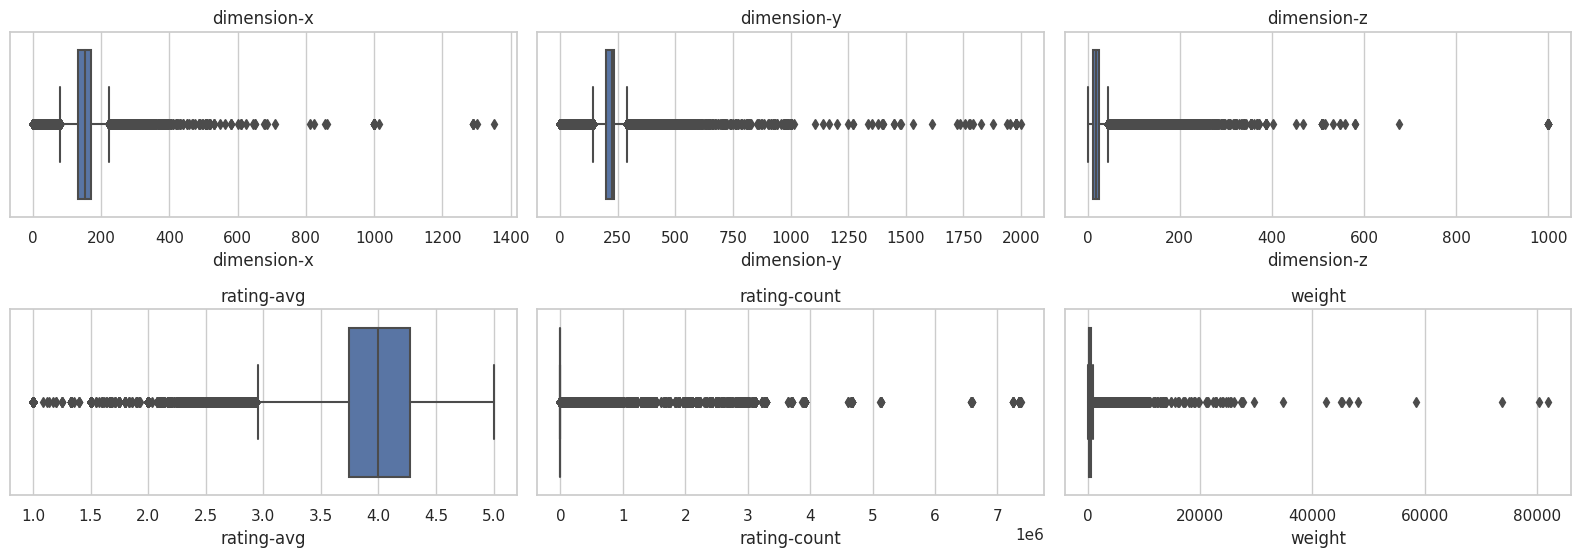

In [ ]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

# Flatten the 2D axes array into a 1D array
axes = axes.flatten()

# Set the seaborn theme
sns.set_theme(style="whitegrid")

# List of columns to plot
columns_to_plot = ["dimension-x", "dimension-y", "dimension-z", "rating-avg", "rating-count", "weight"]

# Loop through the columns and plot each one
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Is there a correlation between weight and dimension-x?

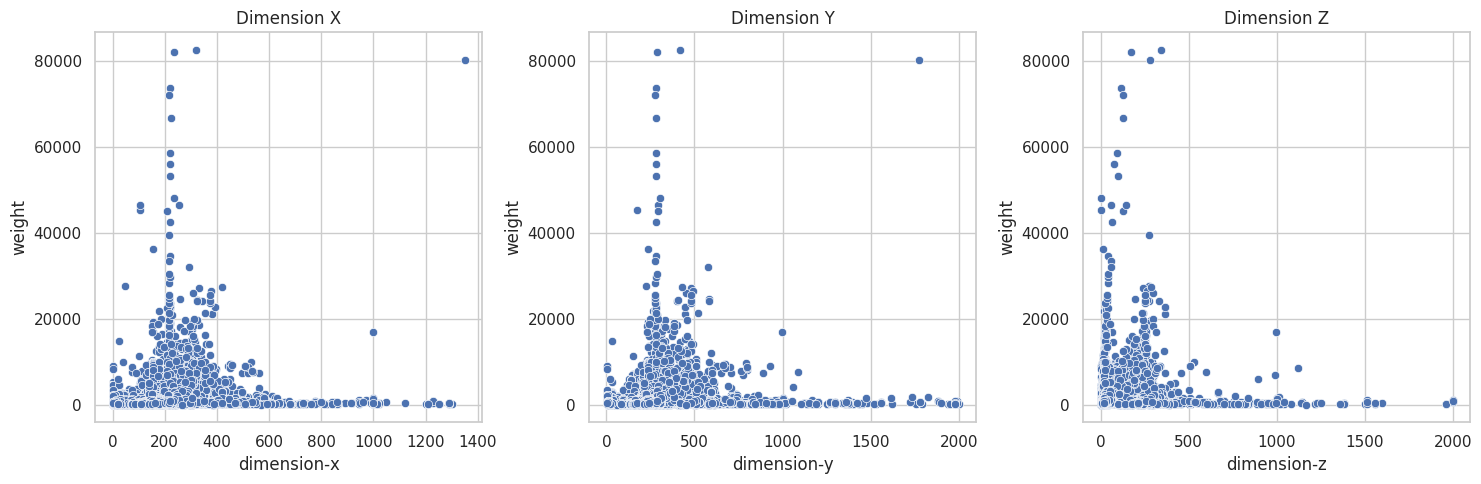

In [ ]:
# Create a 1x3 grid for the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatterplot for dimension-x
sns.scatterplot(x=df["dimension-x"], y=df["weight"], ax=axes[0])
axes[0].set_title("Dimension X")

# Scatterplot for dimension-y
sns.scatterplot(x=df["dimension-y"], y=df["weight"], ax=axes[1])
axes[1].set_title("Dimension Y")

# Scatterplot for dimension-z
sns.scatterplot(x=df["dimension-z"], y=df["weight"], ax=axes[2])
axes[2].set_title("Dimension Z")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

## Observations



*   Most of the books are weighing around 20000 units.
* Weight depends on all the three dimensions x, y and z.
* x and y dimensions are highly correlated with each other.


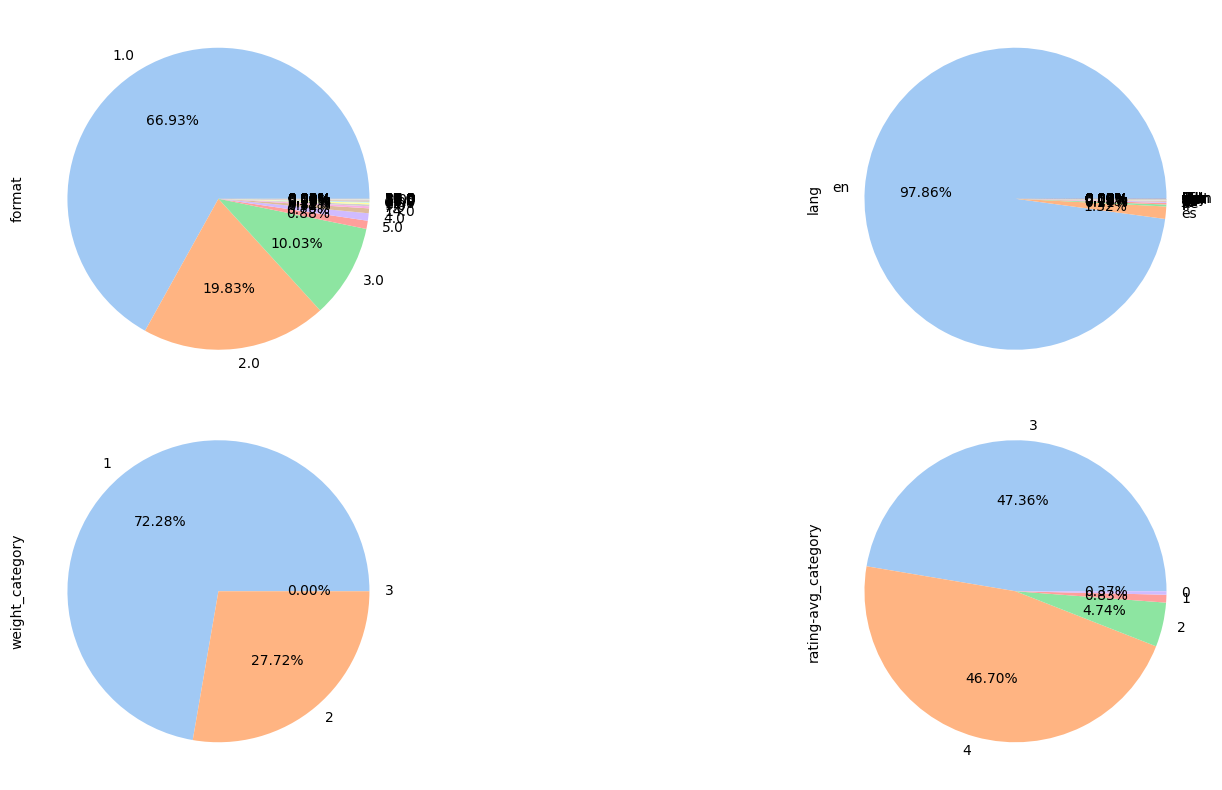

In [ ]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(2, 2, figsize=(15, 4))

# for axid, col in enumerate(["format", "lang", "weight_category", "rating-avg_category"]):
#     col_dist = df[col].value_counts()
#     piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
#     col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(20, 8))

for axid, col in enumerate(["format", "lang", "weight_category", "rating-avg_category"]):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    ax_row, ax_col = divmod(axid, 2)  # Calculate row and column indices
    col_dist.plot(kind='pie', colors=piec_colors, autopct='%1.2f%%', ax=ax[ax_row, ax_col])

plt.tight_layout()
plt.show()



## Observations:
1. We found that most of the books belong to the light weight category whereas the heavy weight books are minimal in number.
2. Most of the books are given higher ratings like 3 and 4.
3. Most of the books are written in English language.

<ipython-input-16-67f08f3783e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')


<Axes: >

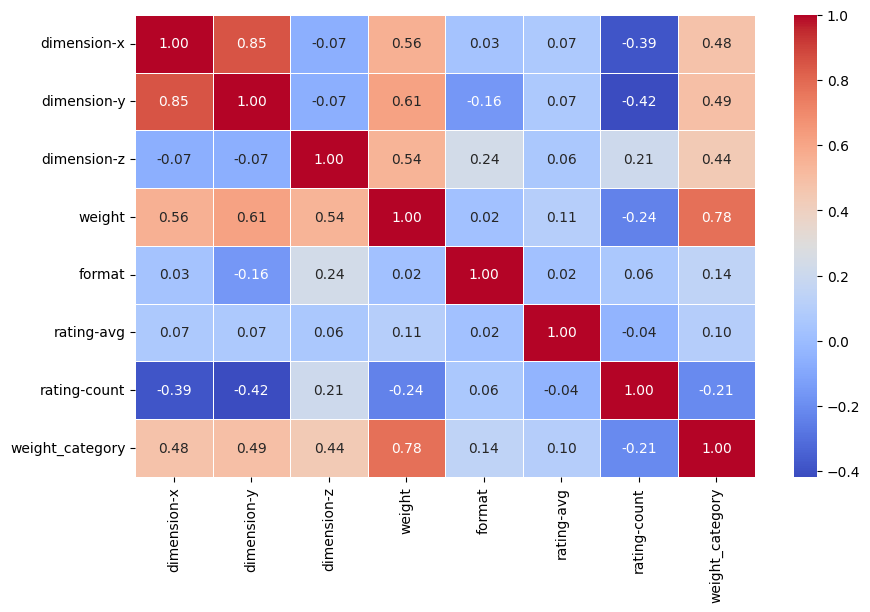

In [ ]:
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4, annot_kws={"size": 10}, cmap='coolwarm',ax=ax)

## Observations

* Weight of the books is highly dependent on its three physical attributes, i.e, x, y and z dimensions.

In [ ]:
data_df = df[['dimension-x','dimension-y','dimension-z','weight']]

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split

X = data_df[['dimension-x', 'dimension-y', 'dimension-z']]
y = data_df['weight_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the model using the scaled training data
classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9201306843443553


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.2826646230590604


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Classifier
svm_classifier = SVC()

# Train the model using the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy with SVM: {accuracy_svm}")

Accuracy with SVM: 0.9090305080004196


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_svm)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.3016611766088841


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Logistic Regression

In [ ]:
lr_classifier_ovr = LogisticRegression(multi_class='ovr', max_iter=10000, random_state=42)

# Train the model using the scaled training data
lr_classifier_ovr.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_lr_ovr = lr_classifier_ovr.predict(X_test_scaled)

# Calculate accuracy
accuracy_lr_ovr = accuracy_score(y_test, y_pred_lr_ovr)

print(f"Accuracy with Logistic Regression (OvR): {accuracy_lr_ovr}")


Accuracy with Logistic Regression (OvR): 0.8623518186405031


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_lr_ovr)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.37102987493763195


In [ ]:
# Initialize the Logistic Regression classifier for OvO
lr_classifier_ovo = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=42)

# Train the model using the scaled training data
lr_classifier_ovo.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_lr_ovo = lr_classifier_ovo.predict(X_test_scaled)

# Calculate accuracy
accuracy_lr_ovo = accuracy_score(y_test, y_pred_lr_ovo)

print(f"Accuracy with Logistic Regression (OvO): {accuracy_lr_ovo}")


Accuracy with Logistic Regression (OvO): 0.8624117655874551


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_lr_ovo)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.37094908161266943


## KNN Classifier

In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1001)

# Train the model using the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy with KNN: {accuracy_knn}")

Accuracy with KNN: 0.9132917368129205


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_knn)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.29451355938318935


## Decision Tree Classifier

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=12,random_state=42)

# Train the model using the scaled training data
dt_classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Accuracy with Decision Tree Classifier: {accuracy_dt}")


Accuracy with Decision Tree Classifier: 0.9196511087687397


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_dt)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.2855308176968795


## Observations

1. The Random Forest Classifier demonstrated the highest performance among all the models, with the Decision Tree Classifier coming in second. Random Forest outperformed the Decision Tree due to its ensemble nature, combining multiple decision trees for better results.

2. Logistic regression showed a decent level of performance. Notably, the one-versus-one approach performed slightly better than the one-versus-rest method, although the difference in accuracies was not substantial.

3. Support Vector Classifier (SVC) delivered a strong performance with an accuracy of approximately 90%. However, it required longer training times due to the dataset's size relative to other models.